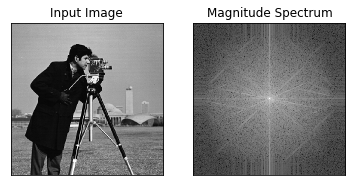

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data

img = data.camera()
img_float32 = np.float32(img)
dft = np.fft.fft2(img_float32)
# dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

# Now once you got the result, zero frequency component 
# (DC component) will be at top left corner. 
# If you want to bring it to center, you need
# to shift the result by \frac{N}{2} in both the directions. 
# This is simply done by the function, np.fft.fftshift().
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(np.abs(dft_shift))
# np.abs(dft_shift)  cv2.magnitude(dft[:,:,0],dft[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

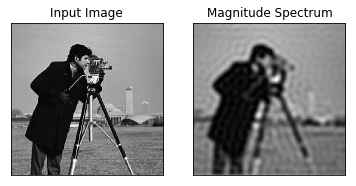

In [3]:
#Task 1 - in the LPF, make filtering region circle not square
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
flt_size = 20
x, y = np.ogrid[:img.shape[0],:img.shape[1]]

# create a mask first, center square is 1, remaining all zeros
isinside_circle = (x - crow)*(x - crow) + (y - ccol)*(y - ccol)
mask_ = (isinside_circle <= flt_size**2).astype(int)

new_shift = dft_shift*mask_
new_ishift = np.fft.ifftshift(new_shift)
d_shift = np.array(np.dstack([new_ishift.real,new_ishift.imag]))
img_back = cv2.idft(d_shift)
#img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

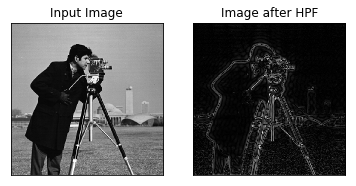

In [4]:
#Task 2 - High-Pass filtering
dft_shift[crow-flt_size:crow+flt_size, ccol-flt_size:ccol+flt_size] = 0
f_ishift = np.fft.ifftshift(dft_shift)
d_shift1 = np.array(np.dstack([f_ishift.real,f_ishift.imag]))
img_back1 = cv2.idft(d_shift1)
img_back1 = cv2.magnitude(img_back1[:,:,0],img_back1[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back1, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
# Task 3 - Make Band Pass Filter 
flt_sz1 = 20
flt_sz2 = 70
x, y = np.ogrid[:img.shape[0],:img.shape[1]]

isinside_circle = (x - crow)*(x - crow) + (y - ccol)*(y - ccol)
mask1 = (isinside_circle <= flt_sz1**2).astype(int)
mask2 = (isinside_circle >= flt_sz2**2).astype(int)
mask3 = np.dstack((mask1,mask2))

# Error occurs in mask3. It has a different shape (512,512,2) instead of (512,512)
# It happens because of dstack() function which stacks arrays in sequence depth wise (along third dimension)
# I could not find the ways in order to concatenate arrays mask1 and mask2

new_shift2 = dft_shift*mask3
new_ishift2 = np.fft.ifftshift(new_shift)
d_shift2 = np.array(np.dstack([new_ishift.real,new_ishift.imag]))
img_back2 = cv2.idft(d_shift2)
#img_back = cv2.idft(new_ishift)
img_back2 = cv2.magnitude(img_back2[:,:,0],img_back2[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back2, cmap = 'gray')
plt.title('Image after Band-Pass'), plt.xticks([]), plt.yticks([])
plt.show()

ValueError: operands could not be broadcast together with shapes (512,512) (512,512,2) 

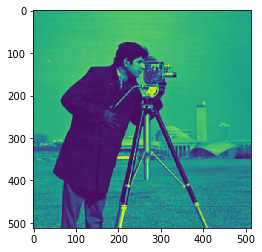

In [9]:
# Task 4 - correct wavelet code

import numpy as np
from matplotlib import pyplot as plt
from skimage import data
from sklearn.preprocessing import MinMaxScaler 
import pywt

img = data.camera()
imArray = np.float32(img)
imArray /= 255;

coeffs = pywt.wavedec2(imArray, 'haar')
coeffs_H = list(coeffs)  
coeffs_H[0] *= 0;  

imArray_H = pywt.waverec2(coeffs_H, 'haar')

#plt.imshow(imArray_H,cmap='gray')
imArray = np.float32(img)
imArray /= 255;

coeffs=pywt.wavedec2(imArray, 'haar')
coeffs_H=list(coeffs)  
coeffs_H[0] *= 0;  

# reconstruction
imArray_H = pywt.waverec2(coeffs_H, 'haar')
plt.imshow(imArray_H)
plt.show()